In [5]:
import pandas as pd
import numpy as np
url = "https://gitlab.com/labsysmed/dissecting-bias/-/raw/master/data/data_new.csv?inline=false"
df = pd.read_csv(url)

In [2]:
df.head()


,risk_score_t,program_enrolled_t,cost_t,cost_avoidable_t,bps_mean_t,ghba1c_mean_t,hct_mean_t,cre_mean_t,ldl_mean_t,race,...,trig_min-high_tm1,trig_min-normal_tm1,trig_mean-low_tm1,trig_mean-high_tm1,trig_mean-normal_tm1,trig_max-low_tm1,trig_max-high_tm1,trig_max-normal_tm1,gagne_sum_tm1,gagne_sum_t
0,1.987430,0,1200.0,0.0,NaN,5.4,NaN,1.110000,194.0,white,...,0,0,0,0,0,0,0,0,0,0
1,7.677934,0,2600.0,0.0,119.0,5.5,40.4,0.860000,93.0,white,...,0,1,0,0,1,0,0,1,4,3
2,0.407678,0,500.0,0.0,NaN,NaN,NaN,NaN,NaN,white,...,0,0,0,0,0,0,0,0,0,0
3,0.798369,0,1300.0,0.0,117.0,NaN,NaN,NaN,NaN,white,...,0,0,0,0,0,0,0,0,0,0
4,17.513165,0,1100.0,0.0,116.0,NaN,34.1,1.303333,53.0,white,...,0,0,0,0,0,0,0,0,1,1


In [24]:
df_white = df[df['race'] == 'white']
df_black = df[df["race"] == 'black']

In [26]:
def percentile_risk_score(df):
    df["percentile"] = pd.qcut(df["risk_score_t"], 100, labels=False)
    mean_p_values = df.groupby("percentile")["gagne_sum_t"].mean()
    mean_p_values = mean_p_values.reset_index()
    return mean_p_values

In [27]:
white_df =percentile_risk_score(df_white)
black_df =percentile_risk_score(df_black)

C:\Users\robsa\AppData\Local\Temp\ipykernel_3364\1664667763.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["percentile"] = pd.qcut(df["risk_score_t"], 100, labels=False)
C:\Users\robsa\AppData\Local\Temp\ipykernel_3364\1664667763.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["percentile"] = pd.qcut(df["risk_score_t"], 100, labels=False)


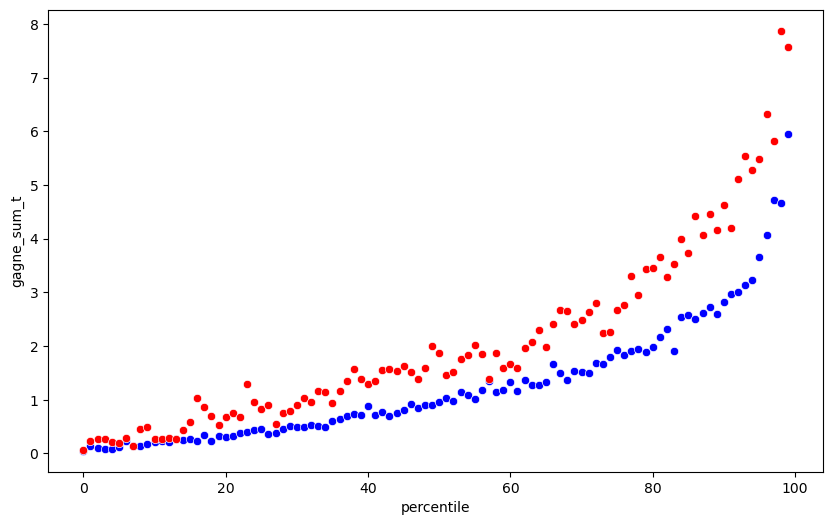

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

sns.scatterplot(white_df, x = "percentile", y = "gagne_sum_t", markers="o", color = "blue")
sns.scatterplot(black_df, x = "percentile", y = "gagne_sum_t", markers="o", color = "red")

plt.show()